# Lab 2

* It is expected that you work individually and the usual plagarism rules apply.
* Submissions are to be made on canvas. Make sure that you add your student ID in the submission comments.
* The main notebook file you submit should read "Lab[number]_[last name].ipynb", for example "Lab2_Bongers.ipynb". 
* Please make sure your code will run without problems

_You need to fill in everywhere that there is a_ '__TODO__'

Feel free ask any questions during the computer lab sessions, or email the TA.

**The due date for the labs is next Wednesday at 23:59**

In [129]:
# Load the numpy numerical computation library
import numpy as np

# Load matplotlib, which controls plotting pretty graphs
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

In the hoorcollege, the gaussian error function was introduced as the function 
$$
\text{erf}(x) = \int_{-x}^x \frac{1}{\sqrt{\pi}} e^{-u^2} \, du
$$
There was also one application mentioned in the slides, about a binary data signal (so please have a look at it, if you don't remember it well).

The aim of this exercise is to

1. randomly generate such a binary data signal, together with the random noise corrupting the signal

2. based on the sample you generated, estimate the error of the receiver

3. do those steps for different values of $\sigma$, and plot the estimations of the errors on the theoretical graph to the error (similar theoretical graph as the one that can be found on slide 37)

First we randomly generate the binary data signal. In the previous lab assignment, we already saw how to generate a string  of size $N$ of $-1$ and $1$ such that the probability to output  $-1$ is $p$.  

In [130]:
# given to students

import random 

def sample_bit(p):
    if random.random() < p: return -1
    else: return 1

def sample(N,p):
    """ N - number of samples
        p - probability of 0"""
    vec=[]
    for i in range(N):
        vec.append(sample_bit(p))
    return vec

# this is given to the students
s = sample(100,0.5)
print(s)

[1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1]


__TODO__ (1.5 pt) The receiver receives the signal together with an error, which we assume to be distributed as a gaussian with mean $0$ and variance $\sigma^2$. Write a function `gaussian(N,mu,sigma)` that generates a sample of size $N$ of data distributed as a gaussian with mean mu and covariance sigma$^2$. You can use any built-in function you want. 

In [131]:
def gaussian(N,mu,sigma):
    return np.random.normal(mu,sigma,N)

__TODO__ (1.5 pt) Now use the previous function to define a new function `received_signal(x,N,mu,sigma)` which given a signal $x$ of size $N$, generate a sample of size $N$ of the signal received by the receiver.

In [132]:
def receiver_signal(x,N,mu,sigma):
    return [1 if i > 0 else -1 for i in x+gaussian(N,mu,sigma)]

__TODO__ (2 pt) Now remember that if the received signal is positive, the receiver interprets that a $1$ was sent and otherwise, the receiver interprets it as a $-1$. 

Let $e_1$ be the number of $1$ that were sent and interpreted as a $-1$ (because of the noise) and let $e2$  be the number of $-1$ that were sent and interpreted as a $1$. Then for a signal of size $N$, the estimated error is given by
$$
\frac{e1+e2}{N}
$$

Using the previous functions, write a function ``estimated_error(N,p,mu,sigma)`` that randomly generates a signal of size $N$, a correspondly received signal and returns the estimated error based on those 2 samples. 

In [133]:
def estimated_error(N,p,mu,sigma):
        signal = sample(N,p)
        received_signal = receiver_signal(signal,N,mu,sigma)
        e1 = 0
        e2 = 0
        for i in range(N):
            if signal[i] == 1 and received_signal[i] == -1:
                e1 += 1
            if signal[i] == -1 and received_signal[i] == 1:
                e2 += 1
        return (e1+e2)/N

__TODO__ (2 pt) We will now plot the estimated errors for different values of $\sigma$. You have to define a function `graph(N,p,mu,sigma_max,k)` which plots the estimated errors for $k$ different values of $\sigma$ between $0$ and $\mathit{sigma\_max}$ (where $p$ is the probability that signal emits  $-1$, $\mathit{mu}$ is the mean of the noise for all error distributions, and $N$ is the size of the signal). 

Those $k$ values of $\sigma$ are uniformly distributed in the interval $[0,\mathit{sigma\_max}]$. In order to produce evenly spaced numbers over a specified interval, use the build-in function `np.linspace`. 

Then run the function for the specific values of $N$, $p$, $\mathit{mu}$, $\mathit{sigma\_max}$ and $k$, as given below.

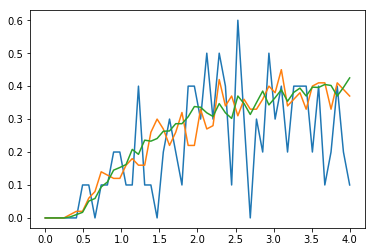

In [134]:
def graph(N,p,mu,sigma_max,k):
    sigma_list = np.linspace(0,sigma_max,num=k)
    plt.plot(sigma_list, [estimated_error(N,p,mu,i) for i in sigma_list]) 
    
#given to students
p=0.5
mu=0
sigma_max=4
k=50

N=10
graph(N,p,mu,sigma_max,k)

N=100
graph(N,p,mu,sigma_max,k)

N=1000
graph(N,p,mu,sigma_max,k)


__TODO__ We will now plot the graph of the "theoretical error" (calculated using the gaussian error) and compare it with the estimators we previously computed. If $p=0.5$ and $mu=0$, it is shown in the slides that the probability of having an error is given by
$$
0.5 \left ( 1 + \text{erf}\left(\frac{-1}{\sigma \sqrt{2}} \right) \right )
$$

Plot the graph of that function for $\sigma \in [0,4]$. 

Below you can find an example on how to plot a gaussian of mean $0$ and $\sigma =2$ (the plot goes from $-4$ to $4$). We used directly a built-in function `norm.pdf` to compute the gaussian function. 

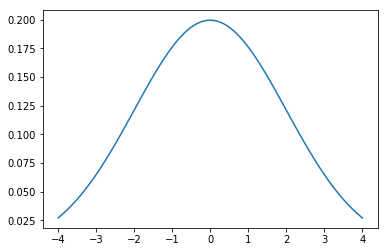

In [135]:
from scipy.stats import norm

x = np.linspace(-4, 4, 100)
plt.plot(x,norm.pdf(x, 0, 2))
plt.show()

__TODO__ (1.5 pt)  Inspired by the previous code, plot the error 
$$
0.5 \left ( 1 + \text{erf}\left(\frac{-1}{\sigma \sqrt{2}} \right) \right )
$$
for $\sigma \in [0,4]$. You can use the built-in function `scipy.special.erf`to compute the erf function.

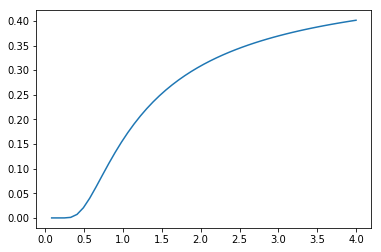

In [136]:
#first 2 lines, given to the students
import scipy
from scipy import special

def theoretical_error(sigma_max,k):
    x = np.linspace(0, sigma_max, k)
    plt.plot(x[1:],[0.5*(1+scipy.special.erf(-1/(i*np.sqrt(2)))) for i in x[1:]])

theoretical_error(sigma_max,k)
# using x[1:] because the first element in np.linspace(0, 4, 50) is a 0 and in the formula you divide by sigma*sqrt(2)
# if sigma is 0 then 0*sqrt(2) is 0 and then you're dividing by 0 which gives an error

__TODO__ (1.5 pt) Now plot in the same graph: the graph we just plotted (with the theoretical error), and the estimated errors for different values of $\sigma$. In other words, combine in one graph the previous graph and the first graph that we plotted. How do the graph of the theoretical error compares with the estimators?

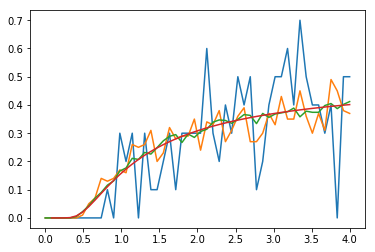

In [138]:
for N in [10,100,1000]:
    graph(N,p,mu,sigma_max,k)

theoretical_error(sigma_max,k)

# The higher the N the closer the estimate comes to the theoretical error